### Numpy basics

In [1]:
import numpy as np # importing convention

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [15]:
m = np.arange(12).reshape((3,4))
print(m)

for i in range(np.shape(m)[1]):
    print("mean column " + str(i+1) +": " + str(np.mean(m[:, i])))

for i in range(np.shape(m)[0]):
    print("mean row " + str(i+1) +": " + str(np.mean(m[i, :])))
    
print("overall mean : " + str(np.mean(m)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
mean column 1: 4.0
mean column 2: 5.0
mean column 3: 6.0
mean column 4: 7.0
mean row 1: 1.5
mean row 2: 5.5
mean row 3: 9.5
overall mean : 5.5


2\. Find the outer product of the following two vectors

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [55]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))

res = np.array([u[i]*v for i in range(np.shape(v)[0])])

print(res)

x = np.tile(v, (np.shape(v)[0], 1))
t = u.reshape(4, 1)
y = np.tile(t, (1, np.shape(t)[0]))

res2 = np.array([x[i, j] * y[i, j] for i in range(4) for j in range(4)]).reshape(4, 4)

print(res2)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [82]:
np.random.seed(123) 

m = np.random.rand(10, 6)

print(m)

mask = (m < 0.1)
m[mask] = 0

for i in range(np.shape(m)[0]):
    for j in range(np.shape(m)[1]):
        if (m[i,j] == 0):
            m[i, :] = 0

print(m)

[[ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897  0.42310646]
 [ 0.9807642   0.68482974  0.4809319   0.39211752  0.34317802  0.72904971]
 [ 0.43857224  0.0596779   0.39804426  0.73799541  0.18249173  0.17545176]
 [ 0.53155137  0.53182759  0.63440096  0.84943179  0.72445532  0.61102351]
 [ 0.72244338  0.32295891  0.36178866  0.22826323  0.29371405  0.63097612]
 [ 0.09210494  0.43370117  0.43086276  0.4936851   0.42583029  0.31226122]
 [ 0.42635131  0.89338916  0.94416002  0.50183668  0.62395295  0.1156184 ]
 [ 0.31728548  0.41482621  0.86630916  0.25045537  0.48303426  0.98555979]
 [ 0.51948512  0.61289453  0.12062867  0.8263408   0.60306013  0.54506801]
 [ 0.34276383  0.30412079  0.41702221  0.68130077  0.87545684  0.51042234]]
[[ 0.69646919  0.28613933  0.22685145  0.55131477  0.71946897  0.42310646]
 [ 0.9807642   0.68482974  0.4809319   0.39211752  0.34317802  0.72904971]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.53155137  0.5318275

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[ 0.          0.06346652  0.12693304  0.19039955  0.25386607  0.31733259
  0.38079911  0.44426563  0.50773215  0.57119866  0.63466518  0.6981317
  0.76159822  0.82506474  0.88853126  0.95199777  1.01546429  1.07893081
  1.14239733  1.20586385  1.26933037  1.33279688  1.3962634   1.45972992
  1.52319644  1.58666296  1.65012947  1.71359599  1.77706251  1.84052903
  1.90399555  1.96746207  2.03092858  2.0943951   2.15786162  2.22132814
  2.28479466  2.34826118  2.41172769  2.47519421  2.53866073  2.60212725
  2.66559377  2.72906028  2.7925268   2.85599332  2.91945984  2.98292636
  3.04639288  3.10985939  3.17332591  3.23679243  3.30025895  3.36372547
  3.42719199  3.4906585   3.55412502  3.61759154  3.68105806  3.74452458
  3.8079911   3.87145761  3.93492413  3.99839065  4.06185717  4.12532369
  4.1887902   4.25225672  4.31572324  4.37918976  4.44265628  4.5061228
  4.56958931  4.63305583  4.69652235  4.75998887  4.82345539  4.88692191
  4.95038842  5.01385494  5.07732146  5.14078798  5.2

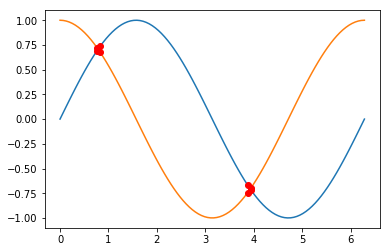

In [97]:
from math import pi
import matplotlib.pyplot as plt

a = np.linspace(0, 2*pi, 100)
ex = a[0: 100: 10]
rev = ex[10:0:-1]
mask = (abs(np.sin(a) - np.cos(a)) < 0.1)
m = a[mask]

print(a)
print(ex)
print(rev)
print(m)

%matplotlib inline 

plt.plot(xs, np.sin(xs));
plt.plot(xs, np.cos(xs));
plt.plot(m, np.sin(m), 'ro');
plt.plot(m, np.cos(m), 'ro');

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [33]:
a = np.array([i*j for i in range(1, 11) for j in range(1, 11)]).reshape(10, 10)

print(a)

dim = np.shape(a)[0]
trace = 0
for i in range(dim):
    trace += a[i,i]
    
print(trace)

antidiagonal = np.array([a[i, dim-i-1] for i in range(dim)])

print(antidiagonal)

ant3 = np.triu(a, 1)
ant3 = np.tril(ant3, 1)
mask = (ant3 != 0)
antoff = ant3[mask]

print(antoff)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [23]:
d = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
dim = np.shape(d)[0]

a = np.array([abs(d[i] - d[j]) for i in range(dim) for j in range(dim)]).reshape(dim, dim)

print(a)

print(1,60934*a)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
1 [[        0  12064932  18463002  44847424  53073514  71597450  89877650
   94082096 116566742 149166432]
 [ 12064932         0   6398070  32782492  41008582  59532518  77812718
   82017164 104501810 137101500]
 [ 18463002   6398070         0  26384422  34610512  53134448  71414648
   75619094  98103740 130703430]
 [ 44847424  32782492  26384422         0   8226090  26750026  45030226
   49234672  71719318 104319008]
 [ 53073514  41008582  34610512   8226090      

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [95]:
N = 100

#mask = np.array([False for i in range(N)])

a = np.arange(0, 100)

for i in range(2, 100):
    a[i:] = (a[i:] % i == 0)
    print(i, a[i:])
    
print(a)

2 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
3 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
4 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
5 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
6 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
7 [1 0 1 0

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.